## Package Installation

In [3]:
import numpy as np  # NumPy numerical computing
import pandas as pd  # Pandas Data Analysis
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import seaborn as sns

## Import Data

In [4]:
cwd=os.getcwd()
FileBonds=os.path.join(cwd,'2_Doktorat','Data','Daten Sustainable Bonds Bloomberg.xlsx')
FileBonds
# File in Laufwerk C: --> Wichtig, immer mal wieder Backup in U: machen

'C:\\Users\\roer\\2_Doktorat\\Data\\Daten Sustainable Bonds Bloomberg.xlsx'

In [5]:
print(FileBonds)

C:\Users\roer\2_Doktorat\Data\Daten Sustainable Bonds Bloomberg.xlsx


## Descreptive Analysis

### Fälligkeitstypen

In [6]:
df_AllBonds=pd.read_excel(FileBonds,sheet_name='All')
# Replace column names spaces with underscores for easier referencing
df_AllBonds.columns = df_AllBonds.columns.str.replace(' ', '_').str.replace('.', '')
df_AllBonds.columns
df_AllBonds

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Emittent,Identifier,ParentID,Ticker,Sust_Linked,Social_Bond,Green_Instrument,Sitzland,Ausg_Mge,Maturity,...,Währungen,Emissionsdatum_-1_Jahr,TotalAssets,MarketCap,TobinsQ,LTLeverage,CFtoAsset,ROA,ROE,TRBC_ES
0,Eviny AS,4296647386,4296647386,BKKNO,0.0,0.0,1.0,NO,112583000.0,6.005479,...,NOK,2019-01-16,22962000000,Unable to resolve all requested identifiers.,NaN,108.47016,0.133968,NaN,NaN,Utilities
1,Vasakronan AB,4296675658,4296675658,FASTIG,0.0,0.0,1.0,SE,11215600.0,20.013699,...,EUR,2018-06-03,Unable to resolve and collect data for all req...,Unable to resolve all requested identifiers.,NaN,Unable to resolve and collect data for all req...,Unable to resolve and collect data for all req...,Unable to resolve and collect data for all req...,Unable to resolve and collect data for all req...,NaN
2,Vasakronan AB,4296675658,4298446161,FASTIG,0.0,0.0,1.0,SE,46947100.0,2.498630,...,SEK,2022-02-06,176226000000,Unable to resolve all requested identifiers.,NaN,NaN,NaN,NaN,NaN,Real Estate
3,Sonae Sierra SGPS SA,4295886870,5000004887,SONAE,1.0,0.0,0.0,PT,56438500.0,7.005479,...,EUR,2021-01-25,1193768868,Unable to resolve all requested identifiers.,NaN,NaN,NaN,NaN,NaN,Consumer Non-Cyclicals
4,WindMW GmbH,5035462141,5000036491,WINDMW,0.0,0.0,1.0,DE,102780500.0,6.041096,...,EUR,2014-12-17,NaN,Unable to resolve all requested identifiers.,NaN,NaN,NaN,NaN,NaN,Government Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073,Credit Agricole Corporate & Investment Bank SA,Retrieving...,CAGR.PA,ACAFP,0.0,0.0,1.0,FR,589405.0,10.008219,...,EUR,2017-06-11,1524232000000,40556989495.5,0.026608,212.92366,-0.014872,0.173701,3.145715,Financials
4074,Credit Agricole Corporate & Investment Bank SA,Retrieving...,CAGR.PA,ACAFP,0.0,0.0,1.0,FR,10000000.0,10.008219,...,USD,2018-09-18,1551572000000,35841930198.624001,0.023100,199.98112,0.018585,0.282273,5.817528,Financials
4075,Erste Jelzalogbank zrt,5056434829,ERST.VI,ERSHUN,0.0,0.0,1.0,HU,NaN,7.515068,...,HUF,2021-10-26,277393700000,15760288062.4,0.056816,117.21441,0.087529,0.634865,8.580108,Financials
4076,Erste Jelzalogbank zrt,5056434829,ERST.VI,ERSHUN,0.0,0.0,1.0,HU,27989612.4,7.189041,...,HUF,2022-02-22,277393700000,16263632000,0.058630,117.21441,0.087529,0.708764,9.682598,Financials


In [7]:
# Selecting specific columns for descriptive statistics
selected_columns = df_AllBonds[['Ausg_Mge', 'Kpn','Maturity']]

# Generating descriptive statistics and rounding
descriptive_stats = np.round(selected_columns.describe(), 2).T[['mean', 'std', 'min', 'max']]

# Display the statistics
latex_green = descriptive_stats.to_latex()
print(latex_green)

\begin{tabular}{lrrrr}
\toprule
{} &          mean &           std &        min &           max \\
\midrule
Ausg\_Mge &  3.004126e+08 &  3.483818e+08 &  166953.50 &  2.848056e+09 \\
Kpn      &  2.670000e+00 &  2.490000e+00 &      -0.33 &  1.752000e+01 \\
Maturity &  7.430000e+00 &  1.668000e+01 &       0.00 &  1.000660e+03 \\
\bottomrule
\end{tabular}



In [8]:
# Calculate the distribution of elements in the 'FällTyp' column
distribution = df_AllBonds['FällTyp'].value_counts()

# Calculate the percentage distribution
percentage_distribution = (distribution / len(df_AllBonds)) * 100

# Print the result
print(percentage_distribution)

AT MATURITY      63.928396
CALLABLE         32.074546
SINKABLE          1.839137
PERP/CALL         1.005395
CONVERTIBLE       0.367827
CALL/SINK         0.269740
EXTENDIBLE        0.196175
CALL/PUT          0.098087
PERP/CALL/PUT     0.073565
PUTABLE           0.049044
PASS-THRU         0.024522
CALL/EXT          0.024522
CONV/PUT          0.024522
Name: FällTyp, dtype: float64


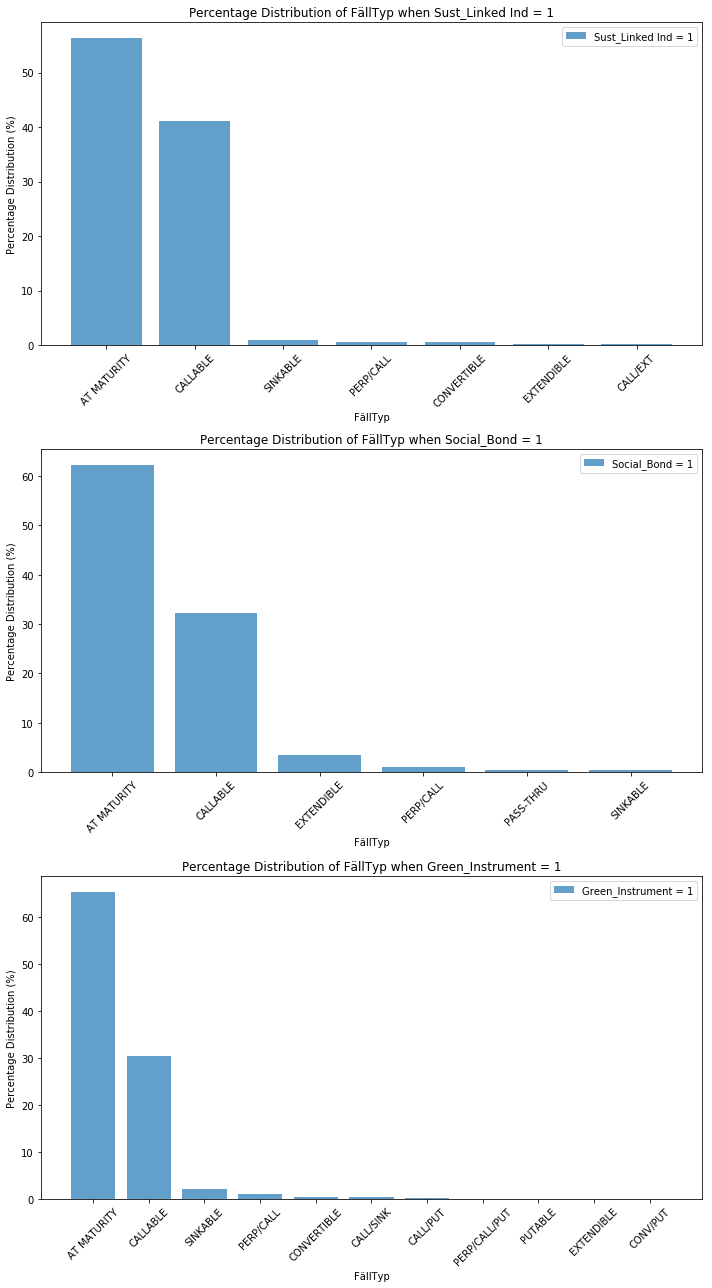

In [9]:
# Calculate the percentage distribution of 'FällTyp' when 'Social Bond' is 1
sust_distribution = (df_AllBonds[df_AllBonds['Sust_Linked'] == 1]['FällTyp'].value_counts() / len(df_AllBonds[df_AllBonds['Sust_Linked'] == 1])) * 100

# Calculate the percentage distribution of 'FällTyp' when 'Social Bond' is 1
social_distribution = (df_AllBonds[df_AllBonds['Social_Bond'] == 1]['FällTyp'].value_counts() / len(df_AllBonds[df_AllBonds['Social_Bond'] == 1])) * 100

# Calculate the percentage distribution of 'FällTyp' when 'Green Instrument' is 1
green_distribution = (df_AllBonds[df_AllBonds['Green_Instrument'] == 1]['FällTyp'].value_counts() / len(df_AllBonds[df_AllBonds['Green_Instrument'] == 1])) * 100

# Create three separate subplots for each column
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot the first subplot (Sust Linked)
axes[0].bar(sust_distribution.index, sust_distribution, label='Sust_Linked Ind = 1', alpha=0.7)
axes[0].set_xlabel('FällTyp')
axes[0].set_ylabel('Percentage Distribution (%)')
axes[0].set_title('Percentage Distribution of FällTyp when Sust_Linked Ind = 1')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Plot the second subplot (Social Bond)
axes[1].bar(social_distribution.index, social_distribution, label='Social_Bond = 1', alpha=0.7)
axes[1].set_xlabel('FällTyp')
axes[1].set_ylabel('Percentage Distribution (%)')
axes[1].set_title('Percentage Distribution of FällTyp when Social_Bond = 1')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

# Plot the third subplot (Green Instrument)
axes[2].bar(green_distribution.index, green_distribution, label='Green_Instrument = 1', alpha=0.7)
axes[2].set_xlabel('FällTyp')
axes[2].set_ylabel('Percentage Distribution (%)')
axes[2].set_title('Percentage Distribution of FällTyp when Green_Instrument = 1')
axes[2].legend()
axes[2].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


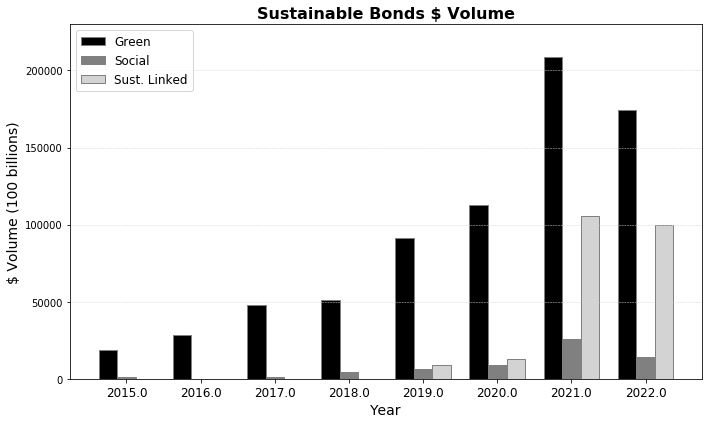

In [10]:
# Replace column names spaces with underscores for easier referencing
df_AllBonds.columns = df_AllBonds.columns.str.replace(' ', '_').str.replace('.', '')

# Convert 'Emissionsdatum' to datetime and extract year
df_AllBonds['Year'] = pd.to_datetime(df_AllBonds['Emissionsdatum'], dayfirst=True).dt.year

# Convert Ausg. Mge to millions
df_AllBonds['Ausg_Mge'] = df_AllBonds['Ausg_Mge']/1e6

# Calculate the volumes for each type of bond
df_AllBonds['Green_Volume'] = df_AllBonds['Green_Instrument'] * df_AllBonds['Ausg_Mge']
df_AllBonds['Social_Volume'] = df_AllBonds['Social_Bond'] * df_AllBonds['Ausg_Mge']
df_AllBonds['Sust_Volume'] = df_AllBonds['Sust_Linked'] * df_AllBonds['Ausg_Mge']

# Melt dataframe for plotting
df_melt = df_AllBonds.melt(id_vars='Year', value_vars=['Green_Volume', 'Social_Volume', 'Sust_Volume'], 
                           var_name='Type', value_name='Volume')

df_AllBonds = df_AllBonds[df_AllBonds['Year'] != 2023]
# Preparing data for bar plot
years = df_AllBonds['Year'].unique()
green_volumes = df_AllBonds.groupby('Year')['Green_Volume'].sum()
social_volumes = df_AllBonds.groupby('Year')['Social_Volume'].sum()
sust_volumes = df_AllBonds.groupby('Year')['Sust_Volume'].sum()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
barWidth = 0.25

# Position of bars on x-axis
r1 = np.arange(len(green_volumes))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Create bars
ax.bar(r1, green_volumes, width=barWidth, color='black', edgecolor='grey', label='Green')
ax.bar(r2, social_volumes, width=barWidth, color='grey', edgecolor='grey', label='Social')
ax.bar(r3, sust_volumes, width=barWidth, color='lightgrey', edgecolor='grey', label='Sust. Linked')

# Aesthetics
ax.set_title('Sustainable Bonds $ Volume', fontsize=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('$ Volume (100 billions)', fontsize=14)
ax.set_xticks([r + barWidth for r in range(len(green_volumes))])
ax.set_xticklabels(sorted(years, reverse=False), fontsize=12)  # Sorting years in ascending order
ax.legend(loc='upper left', fontsize=12)
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, color='lightgrey')
ax.set_facecolor('white')
ax.set_ylim(0, max(max(green_volumes), max(social_volumes), max(sust_volumes)) * 1.1)  # Give 10% space above max value


plt.tight_layout()
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


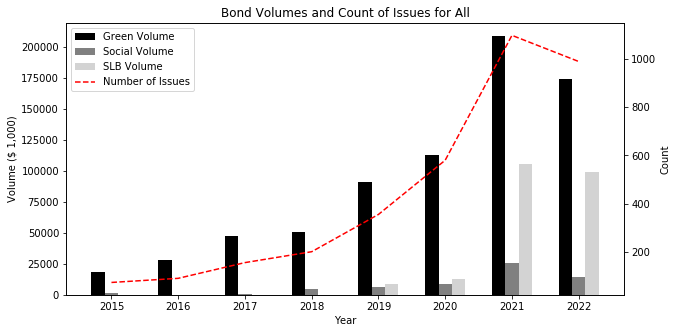

In [11]:
# Replace column names spaces with underscores for easier referencing
df_AllBonds.columns = df_AllBonds.columns.str.replace(' ', '_').str.replace('.', '')

# Ensure the Emissionsdatum is a datetime column
df_AllBonds['Emissionsdatum'] = pd.to_datetime(df_AllBonds['Emissionsdatum'])
df_AllBonds['Year'] = df_AllBonds['Emissionsdatum'].dt.year

# Function to plot volumes and counts by country
def plot_bond_volumes_and_count_by_country(df, countries=None):
    if countries:
        df = df[df['Sitzland'].isin(countries)]
    
    # Calculate volumes for green, social, and sustainable bonds and count of issues per year
    df['Green_Volume'] = df['Green_Instrument'] * df['Ausg_Mge']
    df['Social_Volume'] = df['Social_Bond'] * df['Ausg_Mge']
    df['Sust_Volume'] = df['Sust_Linked'] * df['Ausg_Mge']
    
    yearly_data = df.groupby('Year').agg({
        'Green_Volume': 'sum',
        'Social_Volume': 'sum',
        'Sust_Volume': 'sum',
        'Ticker': 'count'
    }).reset_index()
    
    # Create the bar plot
    fig, ax1 = plt.subplots(figsize=(10, 5))
    
    ax1.bar(yearly_data['Year'] - 0.2, yearly_data['Green_Volume'], width=0.2, label='Green Volume', color='black')
    ax1.bar(yearly_data['Year'], yearly_data['Social_Volume'], width=0.2, label='Social Volume', color='grey')
    ax1.bar(yearly_data['Year'] + 0.2, yearly_data['Sust_Volume'], width=0.2, label='SLB Volume', color='lightgray')
    
    # Create the line plot for count of issues
    ax2 = ax1.twinx()
    ax2.plot(yearly_data['Year'], yearly_data['Ticker'], label='Number of Issues', color='red', linestyle='--')
    
    # Labels & Title
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Volume ($ 1,000)')
    ax2.set_ylabel('Count')
    title_countries = 'All' if not countries else ', '.join(countries)
    plt.title(f'Bond Volumes and Count of Issues for {title_countries}')
    
    # Legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)

    plt.show()

# Call the function with your desired country codes
plot_bond_volumes_and_count_by_country(df_AllBonds)


## Company Data

In [12]:
# clean data
# Replace "Unable to resolve all requested identifiers." with NaN
df_temp = df_AllBonds.replace("Unable to resolve all requested identifiers.", np.nan)

# Create a new DataFrame by dropping the rows where at least one element is missing.
df_filtered = df_temp.dropna()
df_filtered

,Emittent,Identifier,ParentID,Ticker,Sust_Linked,Social_Bond,Green_Instrument,Sitzland,Ausg_Mge,Maturity,...,TobinsQ,LTLeverage,CFtoAsset,ROA,ROE,TRBC_ES,Year,Green_Volume,Social_Volume,Sust_Volume
16,Westpac Securities NZ Ltd/London,XS2016070430,4295856627,WSTPNZ,0.0,0.0,1.0,GB,568.15000,5.005479,...,0.117344,248.55564,0.003355,0.96796,13.571721,Financials,2019.0,568.15000,0.0,0.0
21,CA Immobilien Anlagen AG,XS2248827771,4295858951,CAIAV,0.0,0.0,1.0,AT,413.88550,5.002740,...,0.637443,65.30102,0.044163,6.136024,12.532335,Real Estate,2020.0,413.88550,0.0,0.0
32,Oberbank AG,AT0000A2RZH2,4295859095,OBERBK,0.0,0.0,1.0,AT,296.08750,10.005479,...,0.118593,69.21586,-0.017461,0.413393,3.30378,Financials,2021.0,296.08750,0.0,0.0
43,Raiffeisen Bank International AG,AT000B014782,4295859134,RBIAV,0.0,0.0,1.0,AT,52.16376,5.005479,...,0.057344,83.93453,-0.045966,0.999443,12.499691,Financials,2019.0,52.16376,0.0,0.0
44,Raiffeisen Bank International AG,AT000B015052,4295859134,RBIAV,0.0,0.0,1.0,AT,58.58950,7.002740,...,0.046542,76.22337,-0.043555,0.835738,9.628735,Financials,2020.0,58.58950,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,Credit Agricole CIB Financial Solutions SA,4297843779,CAGR.PA,ACAFP,0.0,0.0,1.0,FR,29.61210,8.131507,...,0.020422,185.01259,0.029039,0.254749,6.15304,Financials,2022.0,29.61210,0.0,0.0
4061,Credit Agricole Corporate & Investment Bank SA,5000038216,CAGR.PA,ACAFP,0.0,0.0,1.0,FR,10.10000,12.008219,...,0.021162,199.98112,0.018585,0.272904,5.502075,Financials,2019.0,10.10000,0.0,0.0
4066,Credit Agricole Corporate & Investment Bank SA,5000038216,CAGR.PA,ACAFP,0.0,0.0,1.0,FR,50.00000,7.005479,...,0.010686,201.93385,0.002294,0.324053,7.056543,Financials,2021.0,50.00000,0.0,0.0
4068,Credit Agricole Corporate & Investment Bank SA,5000038216,CAGR.PA,ACAFP,0.0,0.0,1.0,FR,2.00000,5.504110,...,0.028410,212.92366,-0.014872,0.221516,4.47454,Financials,2018.0,2.00000,0.0,0.0


In [13]:
num_unique_ParentID = df_filtered['ParentID'].nunique()
print("Number of unique elements in 'ParentID':", num_unique_ParentID)

num_unique_ParentID = df_filtered['ParentID'].nunique()
print("Number of unique elements in 'ParentID':", num_unique_ParentID)

# Number of unique 'ParentID' where 'Sust_Linked' is equal to 1
num_unique_sust_linked = df_filtered[df_filtered['Sust_Linked'] == 1]['ParentID'].nunique()
print("Number of unique 'ParentID' where 'Sust_Linked' is 1:", num_unique_sust_linked)

# Number of unique 'ParentID' where 'Social_Bond' is equal to 1
num_unique_social_bond = df_filtered[df_filtered['Social_Bond'] == 1]['ParentID'].nunique()
print("Number of unique 'ParentID' where 'Social_Bond' is 1:", num_unique_social_bond)

# Number of unique 'ParentID' where 'Green_Instrument' is equal to 1
num_unique_green_instrument = df_filtered[df_filtered['Green_Instrument'] == 1]['ParentID'].nunique()
print("Number of unique 'ParentID' where 'Green_Instrument' is 1:", num_unique_green_instrument)

Number of unique elements in 'ParentID': 190
Number of unique elements in 'ParentID': 190
Number of unique 'ParentID' where 'Sust_Linked' is 1: 47
Number of unique 'ParentID' where 'Social_Bond' is 1: 14
Number of unique 'ParentID' where 'Green_Instrument' is 1: 150


In [14]:
cols_to_convert = ['TobinsQ', 'LTLeverage', 'CFtoAsset', 'ROA', 'ROE']

# Convert columns to numeric
for col in cols_to_convert:
    df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce')

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [17]:
# Get counts of unique values in 'TRBC_ES'
trbc_es_counts = df_filtered['TRBC_ES'].value_counts()

# Print the counts
print("Counts of unique values in 'TRBC_ES':\n", trbc_es_counts)

Counts of unique values in 'TRBC_ES':
 Financials                289
Utilities                 151
Industrials               105
Real Estate               100
Basic Materials            35
Consumer Cyclicals         34
Consumer Non-Cyclicals     21
Technology                 21
Energy                      9
Healthcare                  6
Name: TRBC_ES, dtype: int64


In [18]:
# Define the TRBC_ES value you're interested in
trbc_es_value = input("Choosen Industry: ")

# Filter the DataFrame for the specified TRBC_ES value
df_filtered_trbc_es = df_filtered[df_filtered['TRBC_ES'] == trbc_es_value]

# Group by 'Green_Instrument' and calculate descriptive statistics
green_stats = df_filtered_trbc_es[df_filtered_trbc_es['Green_Instrument'] == 1][['TobinsQ', 'LTLeverage', 'CFtoAsset', 'ROA', 'ROE']].describe()

# Group by 'Social_Bond' and calculate descriptive statistics
social_stats = df_filtered_trbc_es[df_filtered_trbc_es['Social_Bond'] == 1][['TobinsQ', 'LTLeverage', 'CFtoAsset','ROA', 'ROE']].describe()

# Group by 'Sust_Linked' and calculate descriptive statistics
sust_stats = df_filtered_trbc_es[df_filtered_trbc_es['Sust_Linked'] == 1][['TobinsQ', 'LTLeverage','CFtoAsset', 'ROA', 'ROE']].describe()

# Print the statistics
print("Green Instrument Statistics:\n", green_stats)
print("\nSocial Bond Statistics:\n", social_stats)
print("\nSust Linked Statistics:\n", sust_stats)

Choosen Industry: Industrials
Green Instrument Statistics:
          TobinsQ  LTLeverage  CFtoAsset        ROA        ROE
count  87.000000   87.000000  87.000000  87.000000  87.000000
mean    0.381478  133.883934   0.046781   2.192265   8.256276
std     0.313092   36.305580   0.019714   1.317608   4.973981
min     0.120457    9.602780   0.028423  -1.140430 -11.079373
25%     0.245002  122.798350   0.038405   1.546234   6.254040
50%     0.278012  138.388340   0.042790   2.229807   9.025468
75%     0.350254  158.522710   0.048769   2.462320  10.158420
max     1.833181  237.187710   0.124436   8.043671  21.519811

Social Bond Statistics:
         TobinsQ  LTLeverage  CFtoAsset       ROA       ROE
count  4.000000    4.000000   4.000000  4.000000  4.000000
mean   0.293325  130.593345   0.034023  2.004179  8.213351
std    0.063814    9.000885   0.006466  0.372531  1.731430
min    0.216651  122.798350   0.028423  1.452433  5.619304
25%    0.253016  122.798350   0.028423  1.941612  8.168511
50

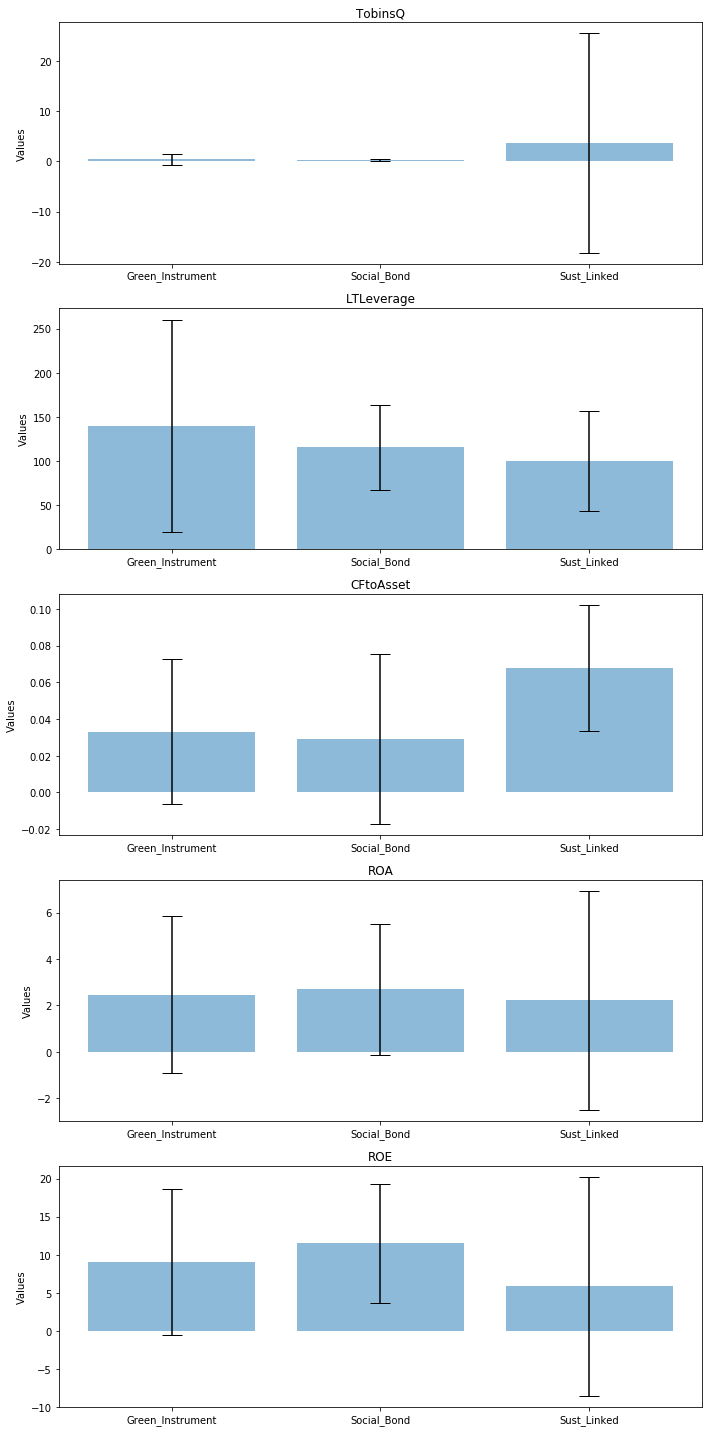

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to analyze
cols_to_analyze = ['TobinsQ', 'LTLeverage', 'CFtoAsset', 'ROA', 'ROE']

# List of instruments
instruments = ['Green_Instrument', 'Social_Bond', 'Sust_Linked']

# Create a figure and axes
fig, axs = plt.subplots(len(cols_to_analyze), 1, figsize=(10, 20))

# Loop over each column to analyze
for i, col in enumerate(cols_to_analyze):
    # Initialize a list to store means and standard deviations for each instrument
    means = []
    stds = []
    
    # Loop over each instrument
    for instrument in instruments:
        # Filter the DataFrame for the current instrument
        df_instrument = df_filtered[df_filtered[instrument] == 1]
        
        # Calculate mean and standard deviation
        mean = df_instrument[col].mean()
        std = df_instrument[col].std()
        
        # Append to the lists
        means.append(mean)
        stds.append(std)
    
    # Create a bar plot for the mean with standard deviation as error bars
    axs[i].bar(instruments, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
    axs[i].set_ylabel('Values')
    axs[i].set_title(f'{col}')

# Show the plot
plt.tight_layout()
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


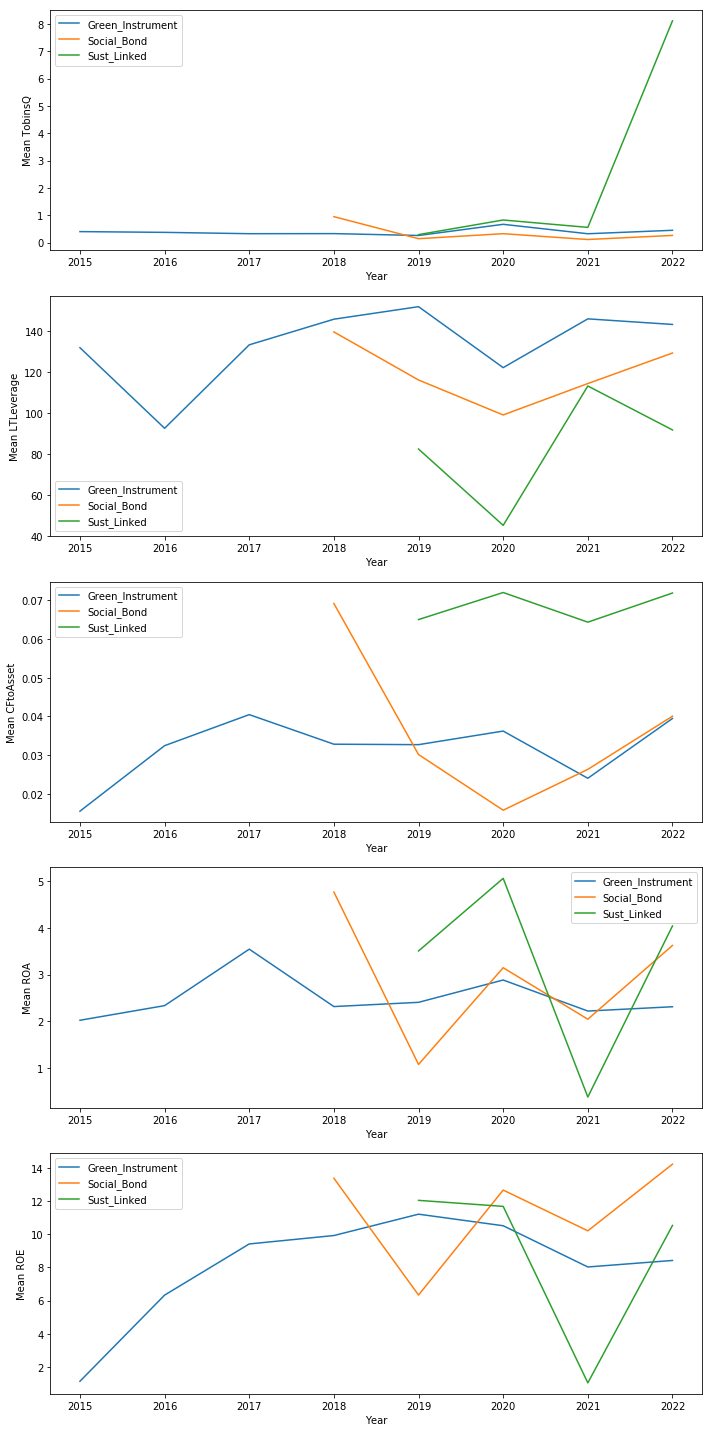

In [24]:
import matplotlib.pyplot as plt

# List of columns to analyze
cols_to_analyze = ['TobinsQ', 'LTLeverage', 'CFtoAsset', 'ROA', 'ROE']

# List of instruments
instruments = ['Green_Instrument', 'Social_Bond', 'Sust_Linked']

# Create a figure and axes
fig, axs = plt.subplots(len(cols_to_analyze), 1, figsize=(10, 20))

# Loop over each column to analyze
for i, col in enumerate(cols_to_analyze):
    # Loop over each instrument
    for instrument in instruments:
        # Filter the DataFrame for the current instrument
        df_instrument = df_filtered[df_filtered[instrument] == 1]
        
        # Group by year and calculate mean
        means = df_instrument.groupby('Year')[col].mean()
        
        # Create a line plot for the mean
        axs[i].plot(means.index, means.values, label=instrument)
    
    axs[i].set_ylabel('Mean ' + col)
    axs[i].set_xlabel('Year')
    axs[i].legend()

# Show the plot
plt.tight_layout()
plt.show()

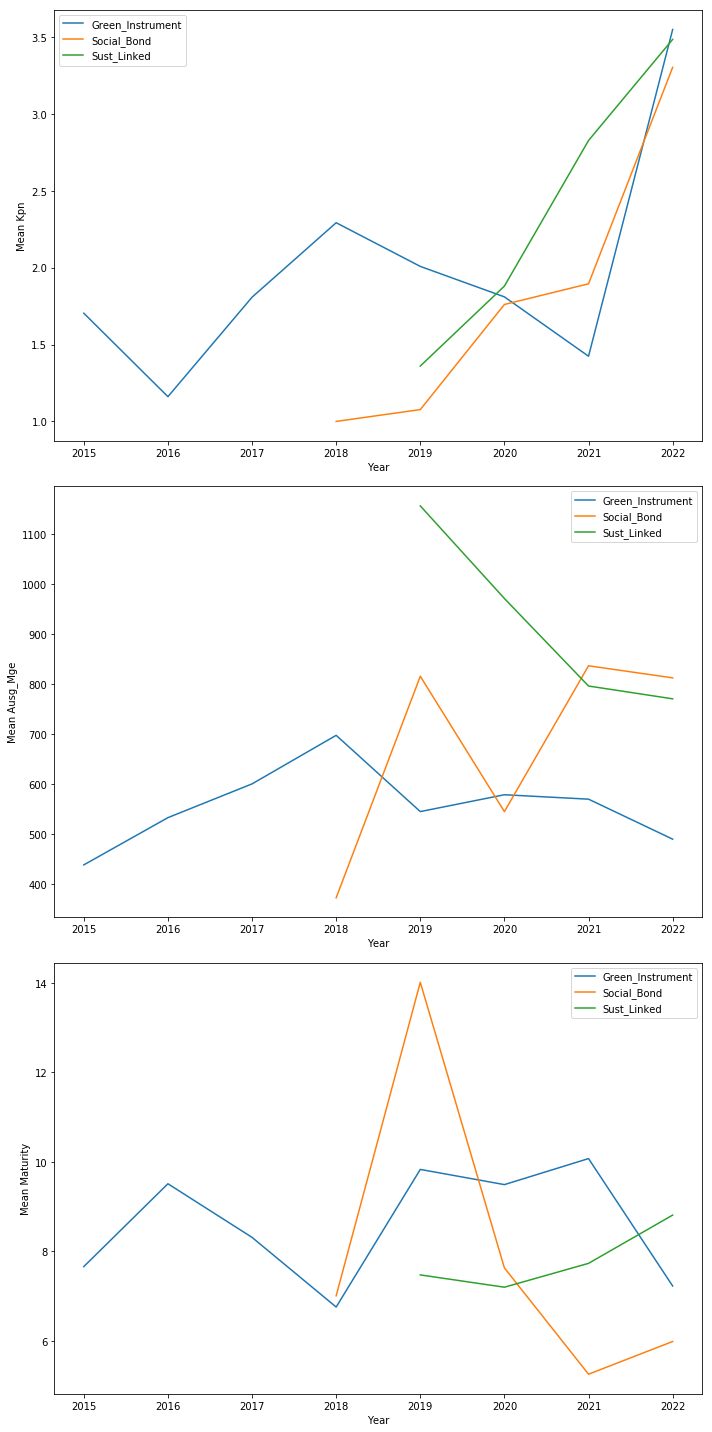

In [26]:
import matplotlib.pyplot as plt

# List of columns to analyze
cols_to_analyze = ['Kpn', 'Ausg_Mge', 'Maturity']

# List of instruments
instruments = ['Green_Instrument', 'Social_Bond', 'Sust_Linked']

# Create a figure and axes
fig, axs = plt.subplots(len(cols_to_analyze), 1, figsize=(10, 20))

# Loop over each column to analyze
for i, col in enumerate(cols_to_analyze):
    # Loop over each instrument
    for instrument in instruments:
        # Filter the DataFrame for the current instrument
        df_instrument = df_filtered[df_filtered[instrument] == 1]
        
        # Group by year and calculate mean
        means = df_instrument.groupby('Year')[col].mean()
        
        # Create a line plot for the mean
        axs[i].plot(means.index, means.values, label=instrument)
    
    axs[i].set_ylabel('Mean ' + col)
    axs[i].set_xlabel('Year')
    axs[i].legend()

# Show the plot
plt.tight_layout()
plt.show()